In [1]:
import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

/gpfs/fs01/user/sf08-a6bd9d84e54f1b-f5ba7b026d15/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# The code was removed by DSX for sharing.

# Read Sequence Data

In [4]:
seqs = pd.read_csv(get_object_storage_file_with_credentials_f53324e0b1bf420c810f804d2c7a35ca('CableCompany', 'accountTimeSeries.csv'))
seqs.head(20)

,AccountId,OrderClass,OrderStatus,AccountDelinquencyStatus,OrderReasonCode
0,10043819,SSSSSSSSSS,OOCOOOOOOC,NNNNNNNNNN,DF.DF.DF.DF.DF.DF.DF.DF.DF.DF
1,10221159,SSSSSSSSSTTSSSSSS,OOXOOXOOXOXCOOOXO,AWNAWNAWNNNNNNNNN,NP.NP.NP.NP.NP.NP.NP.NP.NP.01.01.NT.SJ.SJ.SJ.S...
2,10271483,SS,OC,NN,NT.SE
3,10271491,SS,OC,NN,NT.SE
4,10380306,SSSSSSSSTTTSSS,OOXOOXOXOOCOOX,APNAWNANTTTAPN,NP.NP.NP.NP.NP.NP.NP.NP.D2.D2.D2.NP.NP.NP
5,10504548,SS,OC,VC,OT.OT
6,10678689,SSSS,OOOX,AWPN,NP.NP.NP.NP
7,11650153,TSSSTSSSTTS,OCOOOOCCOCC,NNNNNNNNNNN,H5.NT.NT.NT.H5.NT.NT.DF.H5.H5.SJ
8,11915788,SSSSS,CCCCC,NNCNN,NT.NT.NT.NT.NT
9,12258879,SSS,OOC,NNN,DF.DF.DF


# Compute features and response variable

In [20]:
 def countMyList(mylist,item):
    return mylist.count(item)

In [58]:
def isVoluntaryDisconnect(s):
    return 1. if s[-1] in ['V','C'] else 0.0

def isAllNormal(s):
    return float(s == len(s) * 'N')

def percNoPay(seq):
    mylist = seq.split('.')
    return float(mylist.count('NP')) / len(mylist)

def percTransfServ(seq):
    mylist = seq.split('.')
    return float(mylist.count('OT')) / len(mylist)

In [59]:
print(percNoPay('NP.NP.NP.NP.NP.NP.NP.NP.NP.NT.NT'))

0.8181818181818182


In [60]:
list('NPNP')

['N', 'P', 'N', 'P']

In [61]:
seqs['NumInteractions'] = seqs['OrderClass'].apply(len)
seqs['isVoluntaryDisconnect'] = seqs['AccountDelinquencyStatus'].apply(isVoluntaryDisconnect)
seqs['isNormal'] = seqs['AccountDelinquencyStatus'].apply(isAllNormal)
seqs['percNoPay'] = seqs['OrderReasonCode'].apply(percNoPay)
seqs['percTransfServ'] = seqs['OrderReasonCode'].apply(percTransfServ)

In [62]:
seqs.shape

(573, 10)

In [96]:
list_cols = ['NumInteractions','isVoluntaryDisconnect','isNormal','percNoPay','percTransfServ']
seqs[list_cols].head()

,NumInteractions,isVoluntaryDisconnect,isNormal,percNoPay,percTransfServ
0,10,0.0,1.0,0.000000,0.0
1,17,0.0,0.0,0.529412,0.0
2,2,0.0,1.0,0.000000,0.0
3,2,0.0,1.0,0.000000,0.0
4,14,0.0,0.0,0.785714,0.0


# Get features 

In [97]:

df = seqs[list_cols]

In [98]:
df.shape

(573, 5)

# Shape data for clustering

In [65]:
list_features = df.columns.tolist()

In [66]:
X = df[list_features]

+ check for nulls

In [67]:
X.isnull().sum().sum()

0

+ get dummies if needed

In [99]:
X = pd.get_dummies(X)

X.mean()

NumInteractions          5.773124
isVoluntaryDisconnect    0.162304
isNormal                 0.650960
percNoPay                0.135320
percTransfServ           0.071234
dtype: float64

+ scale data

In [100]:

scaler = preprocessing.MaxAbsScaler() 
Xscaled = pd.DataFrame( scaler.fit_transform(X), columns=X.columns )

Xscaled.mean()

NumInteractions          0.240547
isVoluntaryDisconnect    0.162304
isNormal                 0.650960
percNoPay                0.135320
percTransfServ           0.071234
dtype: float64

+ pca data

In [70]:

pca = PCA(n_components=2)
pca.fit(Xscaled)
Xpca = pd.DataFrame( pca.fit_transform(Xscaled), columns=['pc1','pc2'] )
# principal component analysis
# it's a dimensionality reduction method


+ visualize data

/gpfs/fs01/user/sf08-a6bd9d84e54f1b-f5ba7b026d15/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  from ipykernel import kernelapp as app


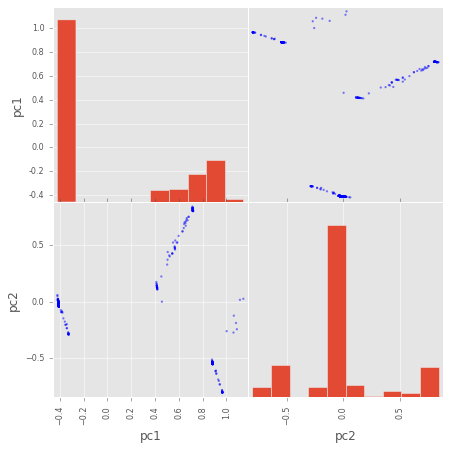

In [103]:
plt.style.use('ggplot')
_ = pd.tools.plotting.scatter_matrix(Xpca, diagonal='hist',figsize=(7,7))

+ run K-means

In [104]:


K=7

kmeans = KMeans(n_clusters=K, tol=0.00001, random_state=1)
kmeans.fit(Xpca)
# get the label for each account using the K-means model
labels = kmeans.predict(Xpca)


In [105]:
cols = Xpca.columns.tolist()

+ visualize clusters

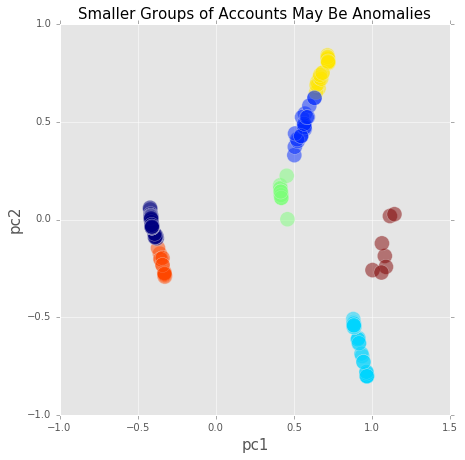

In [106]:
x = Xpca[cols[0]] 
y = Xpca[cols[1]] 
plt.scatter(x, y, s=225, c=labels, alpha=0.5)
plt.gcf().set_size_inches( (7, 7) )
plt.xlabel(cols[0],fontsize=15)
plt.ylabel(cols[1],fontsize=15)
tt = 'Smaller Groups of Accounts May Be Anomalies' 
plt.title(tt,fontsize=15)
plt.show()

In [115]:
#cols1 = Xscaled.columns.tolist()

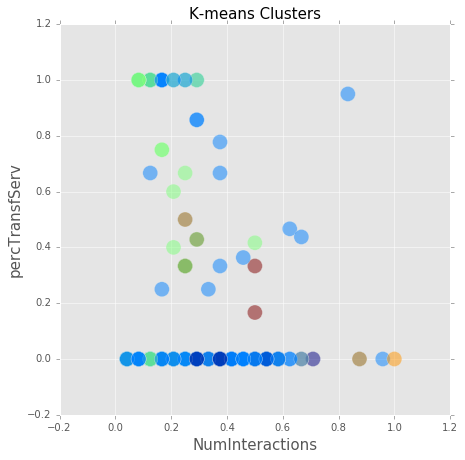

In [82]:
colx = cols1[0]
coly = cols1[4]

x = Xscaled[colx] 
y = Xscaled[coly] 
plt.scatter(x, y, s=225, c=labels, alpha=0.5)
plt.gcf().set_size_inches( (7, 7) )
plt.xlabel(colx,fontsize=15)
plt.ylabel(coly,fontsize=15)
tt = 'K-means Clusters' 
plt.title(tt,fontsize=15)
plt.show()

In [109]:
Xscaled['label'] = labels

In [114]:
Xscaled.label.value_counts()

0    355
2     86
4     65
3     21
1     21
5     18
6      7
Name: label, dtype: int64

In [116]:
seqs['label'] = labels

In [117]:
seqs.loc[seqs['label'] == 6]

,AccountId,OrderClass,OrderStatus,AccountDelinquencyStatus,OrderReasonCode,NumInteractions,isVoluntaryDisconnect,isNormal,percNoPay,percTransfServ,label
278,2010334964,SSSSSSSSSSSS,COOXOOOXOOCC,NAWNAWPNVVCC,NT.NP.NP.NP.NP.NP.NP.NP.OT.OT.OT.OT,12,1.0,0.0,0.583333,0.333333,6
320,3211445484,SSSSSSS,OOOXOOC,AWPNVVC,NP.NP.NP.NP.OT.OT.OT,7,1.0,0.0,0.571429,0.428571,6
381,6012227193,SSSSSSSSS,OOXOOOXOC,AWNAWWNVC,NP.NP.NP.NP.NP.NP.NP.OY.OY,9,1.0,0.0,0.777778,0.000000,6
387,6940727568,SSSSS,OXOOC,WNVVC,NP.NP.OE.OE.OE,5,1.0,0.0,0.400000,0.000000,6
396,10021821894,SSSSSS,OOOOXC,AWPVNC,NP.NP.NP.OT.OT.OZ,6,1.0,0.0,0.500000,0.333333,6
413,10301108598,SSSSSSSSSSSS,OOOOXOOOOXOC,AWWPNAWWPNVC,NP.NP.NP.NP.NP.NP.NP.NP.NP.NP.OT.OT,12,1.0,0.0,0.833333,0.166667,6
501,43010389302,SSSSS,OOXOC,AWNVC,NP.NP.NP.NT.NT,5,1.0,0.0,0.600000,0.000000,6
